In [10]:
from lib2 import *

In [11]:
init_light_glue()

In [ ]:
DATASET_PATH = Path('data/long-hallway')

In [13]:
validate_dataset(DATASET_PATH)

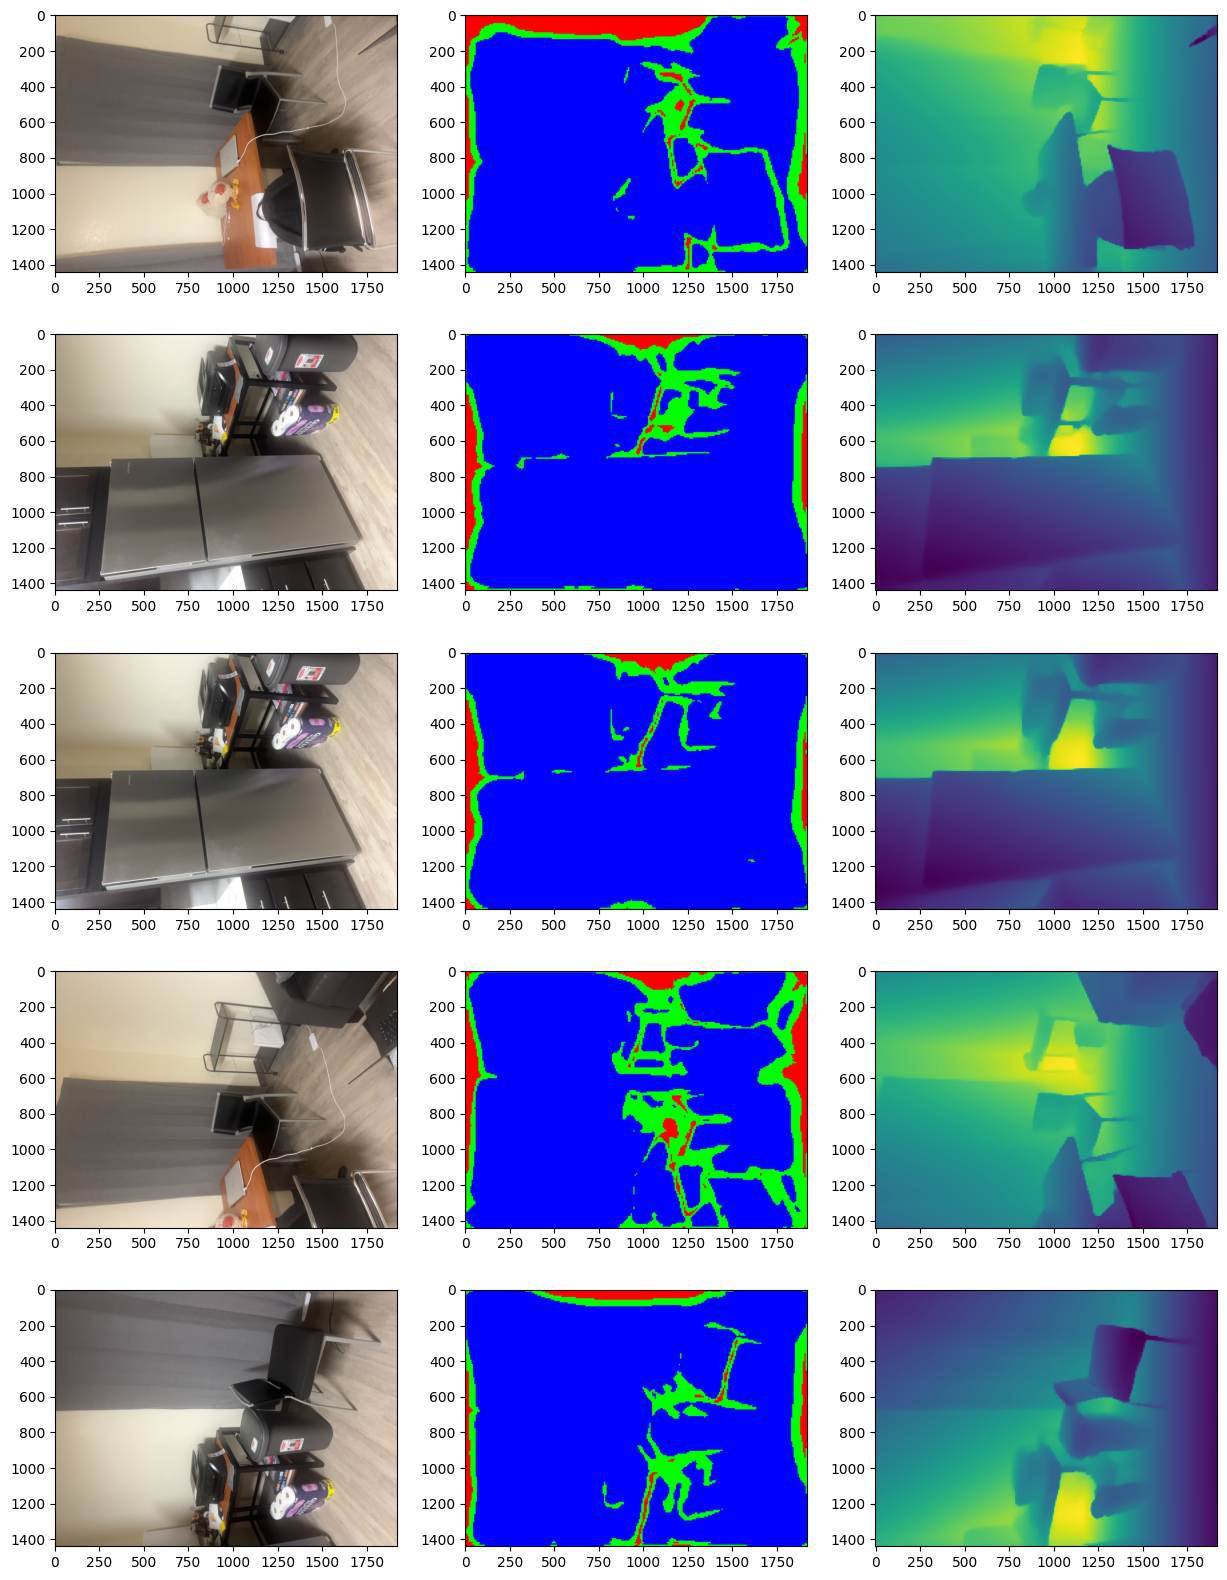

In [14]:
show_random_sample(DATASET_PATH)

In [15]:
EVERY = 10
MAX_NUM_FRAMES = 10

# With ICP
exp_point_cloud, rgb, control_point_cloud, rsme_history = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES)

Processing Frame #1 (for free, since we define it as the origin)
Processing frame #0002... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.82s) - ICP Done (4.00s) - Control Done (0.07s) - Accumulation Done (0.10s) - RSME: 11.98 Done (0.05s) --- Frame finished in 7.18s
Processing frame #0012... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.94s) - ICP Done (1.71s) - Control Done (0.06s) - Accumulation Done (0.10s) - RSME: 16.92 Done (0.05s) --- Frame finished in 5.00s
Processing frame #0022... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.93s) - ICP Done (3.12s) - Control Done (0.07s) - Accumulation Done (0.11s) - RSME: 18.39 Done (0.05s) --- Frame finished in 6.41s
Processing frame #0032... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.87s) - ICP Done (3.67s) - Control Done (0.06s) - Accumulation Done (0.10s) - RSME: 25.76 Done (0.05s) --- Frame finished in 6.89s
Processing frame #0042... Data Load Done (0

In [16]:
# Without ICP
exp_point_cloud_noicp, rgb_noicp, _, rsme_history_noicp = video_to_point_cloud(DATASET_PATH, ransac_matching_threshold=100.0, every=EVERY, max_frames=MAX_NUM_FRAMES, use_icp=False)

Processing Frame #1 (for free, since we define it as the origin)
Processing frame #0002... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.89s) - Control Done (0.05s) - Accumulation Done (0.08s) - RSME: 31.63 Done (0.05s) --- Frame finished in 3.20s
Processing frame #0012... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.92s) - Control Done (0.06s) - Accumulation Done (0.10s) - RSME: 35.36 Done (0.05s) --- Frame finished in 3.26s
Processing frame #0022... Data Load Done (0.10s) - Point Cloud Done (0.04s) - RANSAC Done (2.90s) - Control Done (0.07s) - Accumulation Done (0.13s) - RSME: 64.48 Done (0.05s) --- Frame finished in 3.29s
Processing frame #0032... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.90s) - Control Done (0.07s) - Accumulation Done (0.13s) - RSME: 52.68 Done (0.05s) --- Frame finished in 3.29s
Processing frame #0042... Data Load Done (0.09s) - Point Cloud Done (0.04s) - RANSAC Done (2.88s) - Control Done (0.08s

Text(0.5, 1.0, 'RSME between ground truth and experimental point clouds')

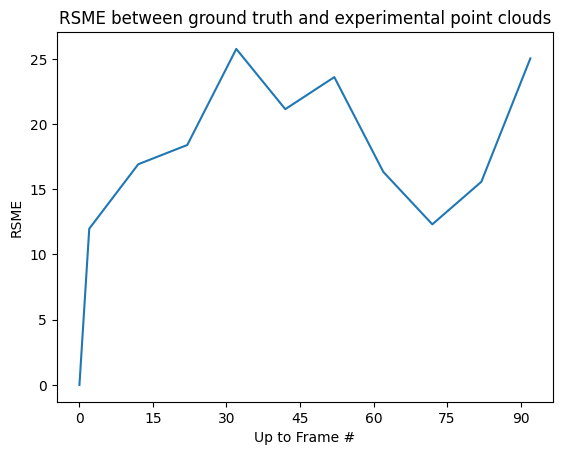

In [17]:
# Graph out rsme_history
fig = plt.figure()
ax = fig.add_subplot()

total_frames_in_dataset = get_total_frames(DATASET_PATH)

# Calculate the frame ids given that we always add frame 0 (as origin)
# we skip EVERY frames and we only want NUM_FRAMES
x = np.concatenate(([0], np.arange(2, total_frames_in_dataset, EVERY)))[0:len(rsme_history)]

ax.plot(x, rsme_history)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Up to Frame #")
ax.set_ylabel("RSME")
ax.set_title("RSME between ground truth and experimental point clouds")

Text(0.5, 1.0, 'RSME between ground truth and experimental point clouds')

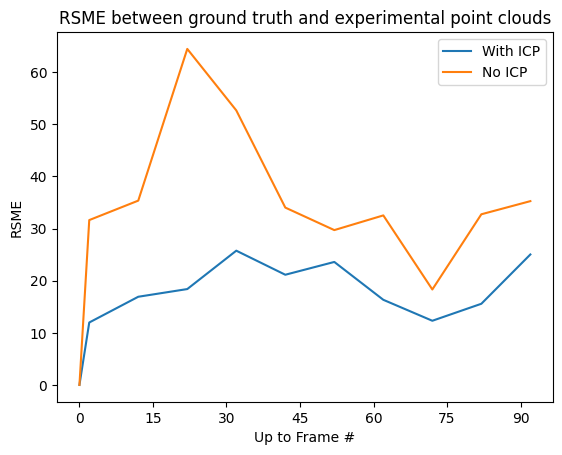

In [18]:
fig, ax = plt.subplots(1)

ax.plot(x, rsme_history, label='With ICP')
ax.plot(x, rsme_history_noicp, label='No ICP')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("Up to Frame #")
ax.set_ylabel("RSME")
ax.legend()
ax.set_title("RSME between ground truth and experimental point clouds")

In [20]:
visualize_point_cloud(exp_point_cloud, rgb)

In [21]:
visualize_point_cloud(exp_point_cloud_noicp, rgb_noicp)